# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science

## Project Milestone 2 using SEER Breast Cancer Dataset   


**Harvard University**<br/>
**Fall 2022**<br/>
**Instructors**: Pavlos Protopapas, Natesh Pillai, and Chris Gumb

<hr style="height:2pt">

In [1]:
# RUN THIS CELL 
import os
import pathlib
working_dir = pathlib.Path().absolute()
os.chdir(working_dir)

# Import libraries
import itertools
import math

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

%matplotlib inline

## Notebook Contents

**Our group for this project is b_Project - Group # 97**

* [Updates from Project Milestone 1](#update) 
* [Overview of Dataset](#overview) 
* [Exploratory Data Analysis (EDA)](#EDA)
* [Baseline Model Design](#baseline)

## Updates from Project Milestone 1 <a class="anchor" id="update"></a>

Using [this spreadsheet](https://docs.google.com/spreadsheets/d/1xM0WfSu73YWKTmy5ljiBWZk6U-470rOkliuZ02ZmNII/edit#gid=0) we decided on the following potential projects # 10, 18, 28, 2. 

As stated in the instructions of the MS2 assignment we proceed to go with our first project choice # 10 Cancer Treatment Decision Making for downstream analysis. However, the dataset was inaccessible. With staff approval, we decided to use a new dataset, SEER Breast Cancer Dataset. 

Jing Teng (2019). SEER Breast Cancer Data. [IEEE Dataport](https://dx.doi.org/10.21227/a9qy-ph35).

## Overview of Dataset <a class="anchor" id="overview"></a>

#### Breast Cancer 

***[what is breast cancer, brief basic bio stuff]***

***[current breast cancer statistics from litterature and includes proper citation (lastname et al. year) for example) and then doc/pdf will have full reference]***

#### Data description

The dataset we are working with is from breast cancer patients obtained from the 2017 November update of the SEER Program of the NCI (Teng (2019)). Specifically, this is a dataset of female patients with infiltrating duct and lobular carcinoma breast cancer diagnosed between 2006-2010 (Teng (2019)). According to Teng (2019) 'patients with unknown tumor size, examined regional lymph nodes (LNs), regional positive LNs, and patients whose survival months that were less than 1 month were excluded; thus, about 4024 patients were ultimately included' in this dataset. There was one duplicate patient data, thus the overall data consists of 4023 observations. Each row of dataset corresponds to a unique patient data described by 15 features (columns 1-15). The class label, which is the Status column, is provided in the last column. 

- **Age**: age at diagnosis in years.  
- **Race**: race of each patient, labeled as White, Black, Other. Orginialy labeled as 'Other (American Indian/AK Native, Asian/Pacific Islander),' but we shortened it to Other. 
- **Marital_Status**: marital status at diagnosis, labeled as Single, Married, Separated, Divorced, Widowed. Originally, labeled as ‘Single (never married)’ and ‘Married (including common law),' but we shortened it to Single and Married. 
- **T_Stage**: part of the TNM system, the T stands for tumor and provides information regarding size and location of the tumor. This dataset contains T1-4. 
    - T1 the tumor is 20 millimeters or smaller 
    - T2 the tumor is larger than 20 millimeters but not larger than 50 millimeters
    - T3 the tumor is larger than 50 millimeters
    - T4 the tumor is of any size that is inflammatory and/or has infiltrated chest wall and/or skin
- **N_Stage**: part of the TNM system, the N stands for lymph node and provides information regarding size and location of lymph nodes where cancer has spread. This dataset contains N1-3. 
     - The N1-3 indicates involvement of regional lymph nodes (number and/or extent of spread) where a higher number, N3, means the cancer is in more lymph nodes, farther away from the original tumor.
- **6th_Stage**: new stage classification, this dataset contains stage II (IIA and IIB) and stage III (IIIA,IIIB, and IIIC):
    - for IIA is defined as either:
        - is not a tumor but is a cancer that as spread to lymph nodes
        - is a tumor less than 2 cm and a cancer that has spread to lymph nodes 
        - is a tumor between than 2-5 cm but is not a cancer that has spread to lymph nodes
     - for IIB is defined as either:
         - is a tumor between than 2-5 cm and a cancer that has spread to lymph nodes
         - is a tumor larger than 5 cm but is not a cancer that has spread to lymph nodes
     - for IIIA is defined as either:
        - is a tumor less than 2 cm and a cancer that has spread to 4-9 lymph nodes 
        - is a tumor larger than 5 cm and cancer clusters found in lymph nodes
        - is a tumor larger than 5 cm and cancer has spread to lymph nodes near the breastbone or underarm
     - for IIIB is defined as:
         - is a tumor of any size, cancer has spread to chest wall or breast skin, and cancer has spread to lymph nodes
     - for IIIC is defined as either:
        - not a tumor but a cancer that has spread to 10+ lymph nodes 
        - not a tumor but a cancer that has spread to lymph nodes near collar bone 
        - not a tumor but a cancer that has spread to lymph nodes near underarm or breast bone 
- **Grade**: the grading system is used to describe how quickly a breast tumor is likely to grow and spread, this dataset includes Grade I-IV: 
    - Grade I is well differentiated
    - Grade II is moderately differentiated
    - Grade III is poorly differentiated
    - Grade IV is undifferentiated or anaplastic
- **A_Stage**: according to Teng (2019) it is a simplified version of stage: in situ, localized, regional, distant, & unknown in the dataset this is summarized as either: 
    - regional—a neoplasm that has extended either
        - beyond the limits of the organ of origin directly into surrounding organs or tissues; 
        - into regional lymph nodes by way of the ymphatic system; or 
        - by a combination of extension and regional lymph nodes.
    - distant—a neoplasm that has spread to parts of the body remote from the primary tumor either by direct extension or by discontinuous metastasis (e.g., implantation or seeding) to distant organs, issues, or via the lymphatic system to distant lymph nodes
- **Tumor_Size**: size of tumor in millimeters. 
- **Estrogen_Status**: a biomarker, breast cancer cells that have estrogen receptors are positive and breast cancer cells that do not have estrogen receptors are negative.
- **Progesterone_Status**: a biomarker, breast cancer cells that have progesterone receptors are positive and breast cancer cells that do not have progesterone receptors are negative.        
- **Regional_Node_Examined**: total number of regional lymph nodes that were removed and examined.    
- **Reginol_Node_Positive**: the number of regional lymph nodes found to contain metastases. 
- **Survival_Months**: survival in months based on complete dates.             
- **Status**: class label of either alive or dead calculated using study cutoff.                      

**For more detail about biological definitions of features in this dataset you can refer to [National Breast Cancer](https://www.nationalbreastcancer.org/what-is-breast-cancer/) and [IEEE Dataport](https://dx.doi.org/10.21227/a9qy-ph35) sites.**

### <span style="color:red">Not clear at the moment</span> 
- in the race column should have a rows that are labeled 'Other unspecified' and 'Unknown' according to this [link](https://ieee-dataport.org/open-access/seer-breast-cancer-data). But there are no rows with either of those labels. 
- how much detail is needed for data description??? There is too much cancer classifications here. used these links [National Breast Cancer](https://www.nationalbreastcancer.org/what-is-breast-cancer/), [IEEE Dataport](https://dx.doi.org/10.21227/a9qy-ph35).

## Exploratory Data Analysis (EDA) <a class="anchor" id="EDA"></a>

Not all, but some of the following code below were modified from the this [kaggle notebook](https://www.kaggle.com/code/jnegrini/breast-cancer-dataset/notebook). Currently this is only the basic_info function. 

In [2]:
# Loading the dataset and remove extra space 
df = pd.read_csv("SEER_Breast_Cancer.csv", skipinitialspace = True)

In [3]:
df.columns

Index(['Age', 'Race ', 'Marital Status', 'Unnamed: 3', 'T Stage ', 'N Stage',
       '6th Stage', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [4]:
# Remove all whitespace and replace with _ in columns  
df.columns = df.columns.str.strip().str.replace(' ', '_')

In [5]:
df.dtypes

Age                         int64
Race                       object
Marital_Status             object
Unnamed:_3                float64
T_Stage                    object
N_Stage                    object
6th_Stage                  object
Grade                      object
A_Stage                    object
Tumor_Size                  int64
Estrogen_Status            object
Progesterone_Status        object
Regional_Node_Examined      int64
Reginol_Node_Positive       int64
Survival_Months             int64
Status                     object
dtype: object

In [6]:
def basic_info(df):
    size = df.shape
    sum_duplicates = df.duplicated().sum()
    sum_null = df.isnull().sum().sum()
    
    # Check cols with NA 
    cols_null=df.isna().any().sum()
        
    # Check rows with NA 
    is_NaN = df.isnull()
    row_has_NaN = is_NaN.any(axis=1)
    rows_with_NaN = df[row_has_NaN]
    count_NaN_rows = rows_with_NaN.shape
    return print("Number of Samples: %d \nNumber of Features: %d \nDuplicated Entries: %d \nNull Entries: %d \nNumber of Columns with Null Entries: %d \nNumber of Rows with Null Entries: %d" 
                 %(size[0],size[1], sum_duplicates, sum_null, cols_null, count_NaN_rows[0]))

basic_info(df)

Number of Samples: 4024 
Number of Features: 16 
Duplicated Entries: 1 
Null Entries: 4024 
Number of Columns with Null Entries: 1 
Number of Rows with Null Entries: 4024


In [7]:
# Remove duplicated row
df = df.drop_duplicates()

In [8]:
# Drop the Unnamed: 3 col that is empty 
df = df.drop(['Unnamed:_3'],axis=1)

In [9]:
basic_info(df)

Number of Samples: 4023 
Number of Features: 15 
Duplicated Entries: 0 
Null Entries: 0 
Number of Columns with Null Entries: 0 
Number of Rows with Null Entries: 0


It seems that the main source of NaN was only from one column, `Unnamed:_3`, and once it was removed the data has no missing values. 

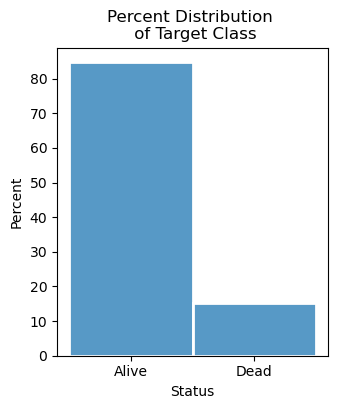

In [10]:
fig, axes=plt.subplots(figsize=(3.5,4))

axes=sns.histplot(data=df, x='Status', stat='percent', linewidth=2, edgecolor='white').set_title('Percent Distribution \n of Target Class')

plt.show()

#### From the percent distribution of the `Status` variable, the class we are to trying to predict, there seems to be class imbalance. We will need to fix for this using [ ] in order to have relatively equal number of samples in each class.

In [11]:
# shorten martial status row elements 
update_martial = {'Married (including common law)' : 'Married', 
                  'Single (never married)' : 'Single'}

df_updated = df.replace({"Marital_Status": update_martial})

# shorten grade row elements 
update_grade = {'Well differentiated; Grade I' : 'Grade I', 
                'Moderately differentiated; Grade II' : 'Grade II', 
                'Poorly differentiated; Grade III' : 'Grade III',
                'Undifferentiated; anaplastic; Grade IV': 'Grade IV'}

df_updated = df_updated.replace({"Grade": update_grade})

# shorten race row elements 
update_race = {'Other (American Indian/AK Native, Asian/Pacific Islander)' : 'Other'}

df_updated = df_updated.replace({"Race": update_race})

In [12]:
# potential predictors 
keep_preds=['Age', 'Race', 'Marital_Status', 'T_Stage', 'N_Stage', '6th_Stage',
       'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status',
       'Progesterone_Status', 'Regional_Node_Examined',
       'Reginol_Node_Positive', 'Survival_Months']

# categorize each by whether its continuous (cont)  or categorical (cat) 
preds_plot=["cont", "cat", "cat", "cat", 
    "cat", "cat", "cat", "cat",
    "cont", "cat", "cat", "cont",
    "cont", "cont"]

In [13]:
print(df_updated.shape)

df_plot=df_updated.copy()

(4023, 15)


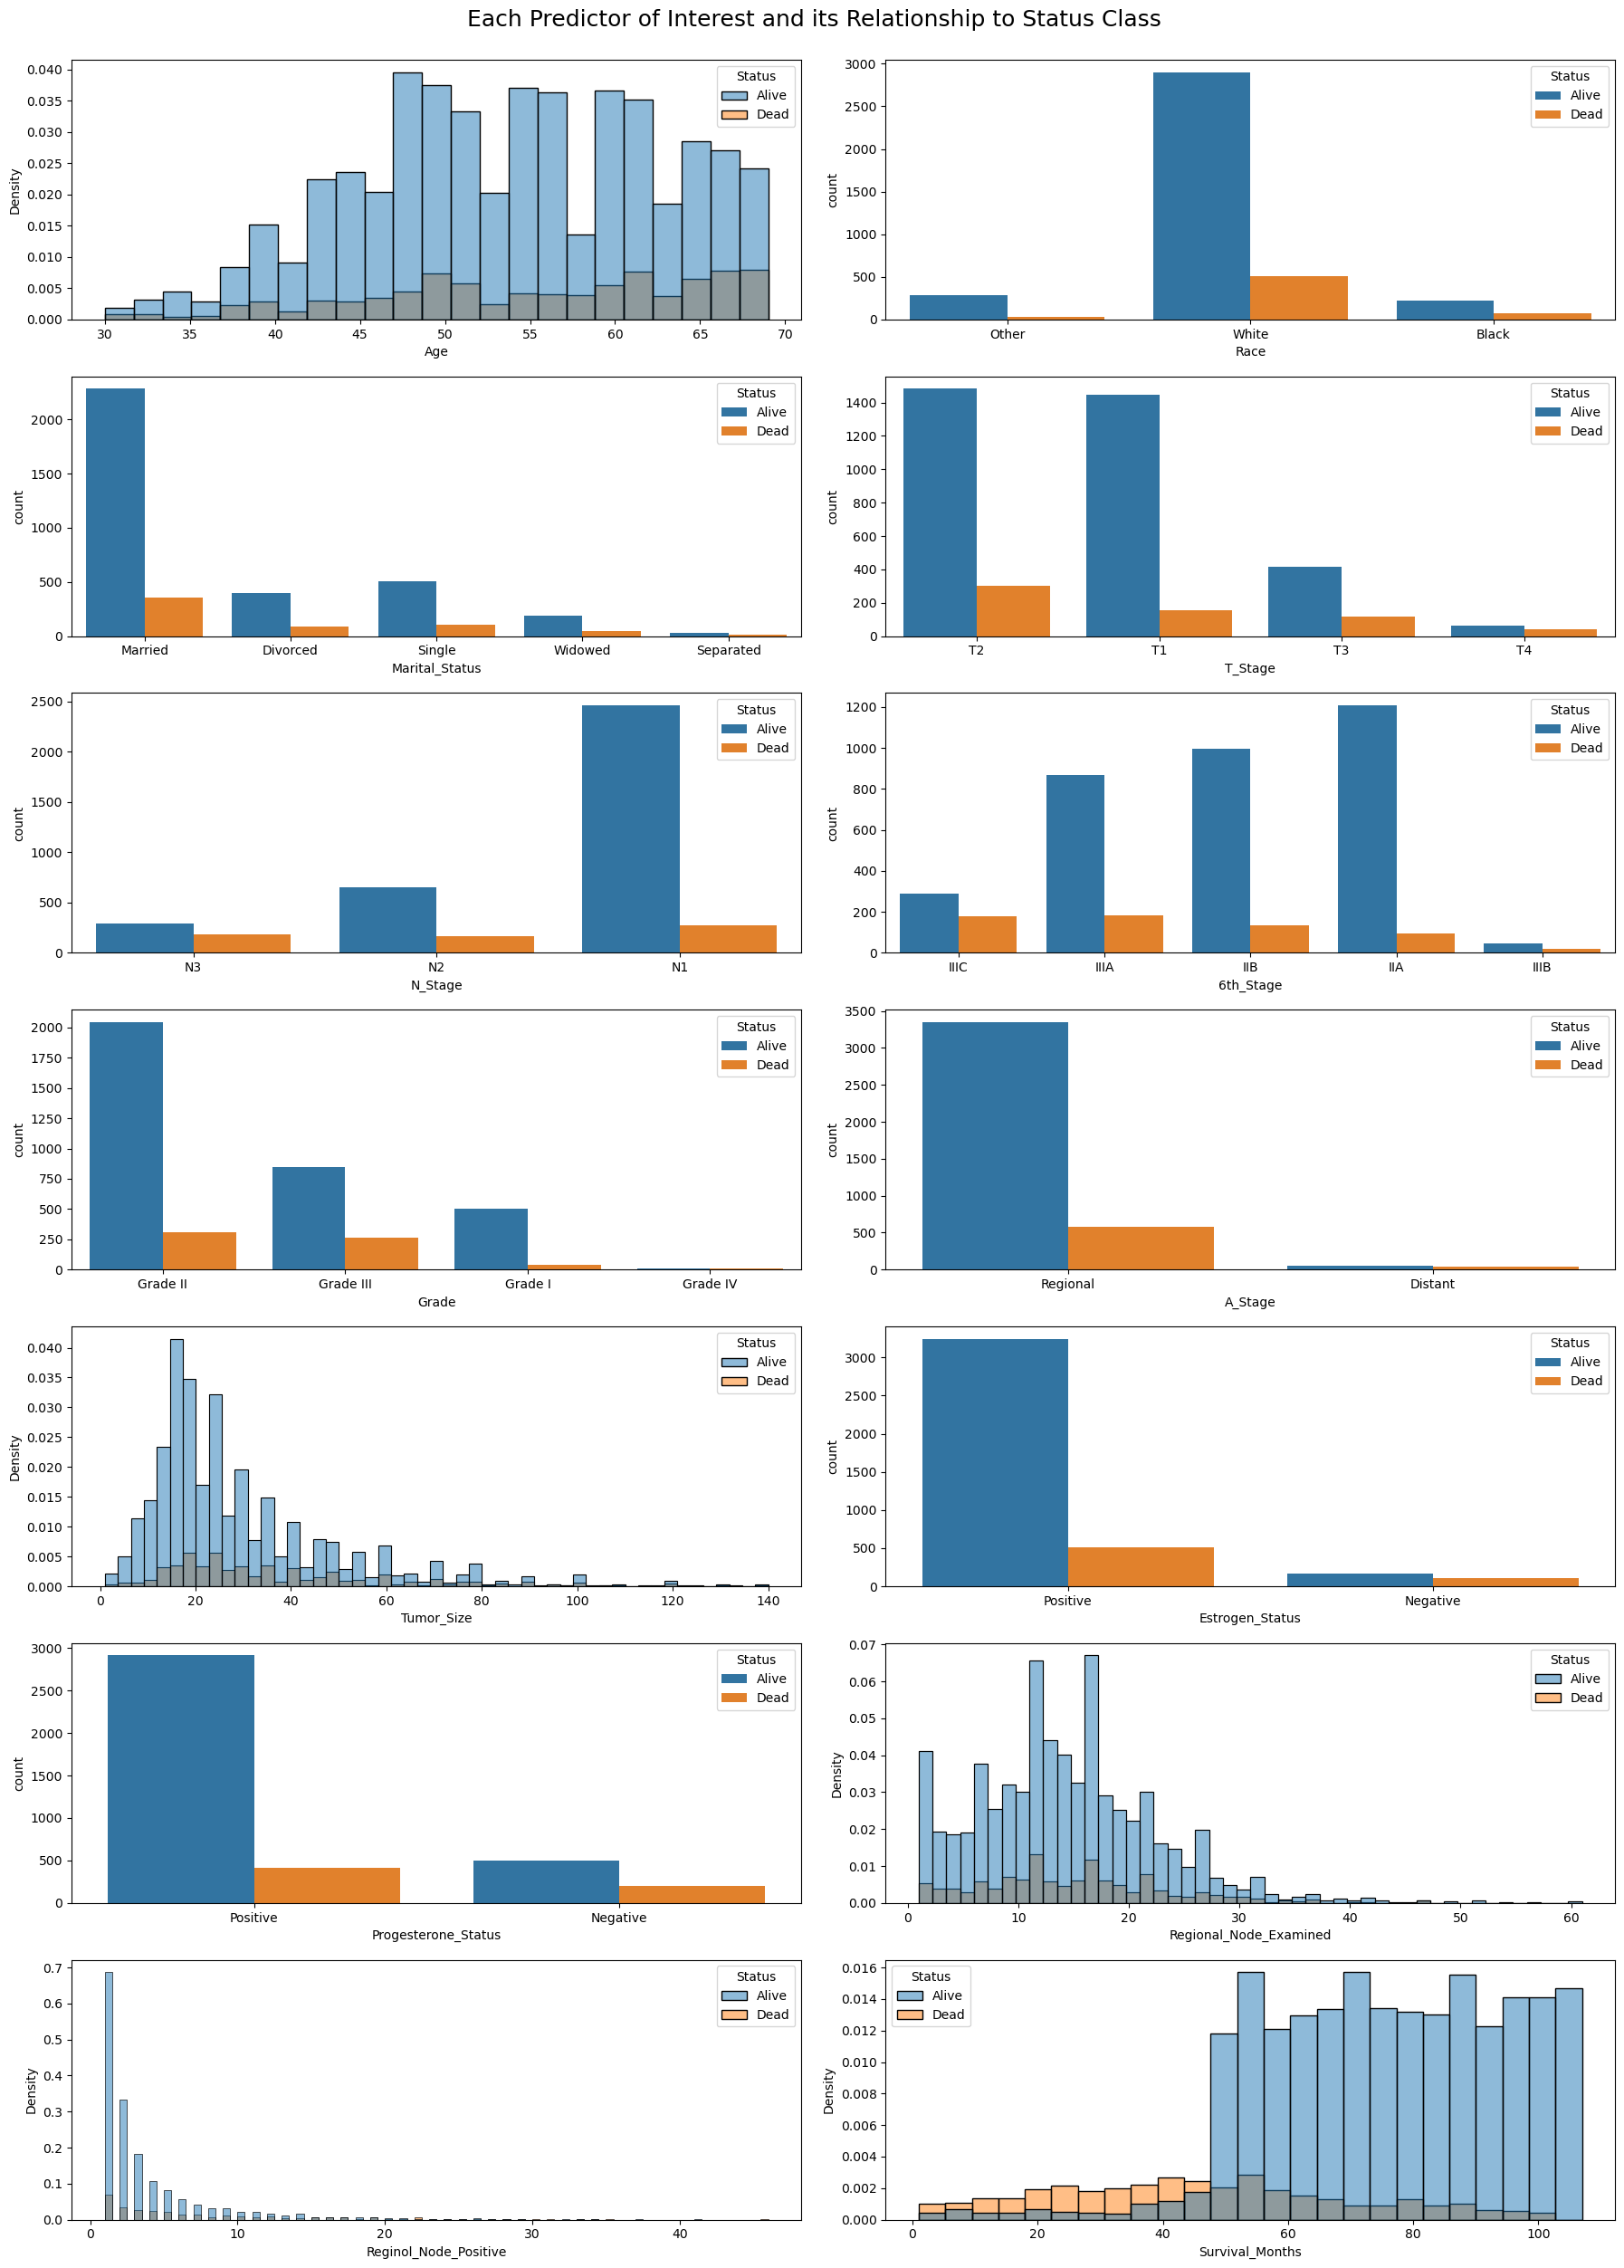

In [14]:
# Plotting 

#### make bar plots for all of predictors  
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(18,25))
ax = ax.flatten()

# enumerate through each axis, plot based on predictor type
for i, (predictor, predictor_type) in enumerate(zip(keep_preds, preds_plot)):
    # print(i, predictor, predictor_type)
    
    if predictor_type == 'cont':
        sns.histplot(data=df_plot, x=predictor, hue="Status", ax=ax[i], stat='density')
        
    if predictor_type == 'cat':
        sns.countplot(data=df_plot, x=predictor, hue="Status", ax=ax[i])

    ax[i].set_xlabel(predictor, fontsize=10)



plt.suptitle("Each Predictor of Interest and its Relationship to Status Class", y=1, fontsize=18)

plt.tight_layout()
plt.show()

#### <span style="color:red"> above plots should all have proportion/density instead of counts?</span> 
#### <span style="color:red"> other ideas for EDA: boxplots, correlations, for the continuous features etc. </span> 
#### <span style="color:red"> from the above plots thinking we will need to pick most interesting (plots that correspond to the predicators were interested in) for the doc.</span> 

In [23]:
# Class label 
df_updated.loc[df['Status'] == 'Dead', ['Class']] = 0
df_updated.loc[df['Status'] == 'Alive', ['Class']] = 1

df = df_updated.drop(['Status'], axis=1)

## Baseline Model Design <a class="anchor" id="baseline"></a>

#### Project Questions
- MS2 assignment: revised project question based on your group's interests and the insights gained through EDA. Be sure to keep the scope manageable
- maybe use status as the class we want to predicate based on set of predicators
- can narrow down the number of predicators based on interesting questions we want to investigate, can use literature to help us come up with some interesting questions here 
- maybe not use all the predicators, especially T_stage predicator since T1-3 (in cm) also describes tumor_size (in mm)

#### Baseline Model 

- MS2 assignment states: baseline model should be more sophisticated than a 'naive' model like in HW5 that simply predicts the majority class or mean response value. A baseline model either implemented or clearly described.
- should we use logistic regression as baseline? and then we can use more sophisticated classification (like random forest classifier) to compare in MS3?
- no missingness detected 
- thinking there is class imbalance, see plot for percent distribution of target class. will need to fix this.
- will need to use one-hot encoding for categorical predicators we choose to pick
- splitting data stick to a ranomd_state so reproducible

### <span style="color:red"> Questions for TF</span> 


- hmm...should scale the data? maybe unnecessary as no columns have drastically wide range data points. can also ask TF to make sure. 
- we are mixed group (109a and 209a members) so does our baseline model (or even for MS3) need to include anything special from 209a material? can also ask TF here.
- is it okay to borrow (which is then modified) code (for example stackoverflow, kaggle notebook, course material/sections, etc.) given that full credit is clearly stated in the ipynb file? 
- we don't need to code for the baseline model? a description is sufficient for MS2 submission? but for MS3 baseline model will need to implemented/coded.
- we need to include the data file for submission, file types can only be ipynb, pdf, doc, and docx in canvas, which is csv?
- no need to include the yml file for submission as well?
- how much detail is needed for data describtion??? There is too much cancer classifications here. 